In [1]:
from binance import Client  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

client = Client()

In [2]:
def getdailydata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1d', '2 years ago UTC'))
    frame = frame[[0,4]]
    frame.columns = ['Timestamp', symbol]
    frame = frame.set_index('Timestamp')
    frame = frame.astype(float)
    
    return frame

In [3]:
getdailydata('BTCUSDT')

,BTCUSDT
Timestamp,
1584403200000,5312.64
1584489600000,5393.04
1584576000000,6162.37
1584662400000,6208.36
1584748800000,6186.98
...,...
1647043200000,38807.36
1647129600000,37777.34
1647216000000,39671.37


In [4]:
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT', 'LTCUSDT']

In [5]:
prices = []
for symbol in symbols:
    prices.append(getdailydata(symbol))

In [6]:
df = pd.concat(prices, axis=1)

In [7]:
df

,BTCUSDT,ETHUSDT,BNBUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,LTCUSDT
Timestamp,,,,,,,
1584403200000,5312.64,115.67,10.2576,0.14694,0.02575,0.001622,34.07
1584489600000,5393.04,118.11,10.3866,0.14760,0.02607,0.001600,34.71
1584576000000,6162.37,136.30,12.2597,0.16460,0.03030,0.001770,38.90
1584662400000,6208.36,133.48,11.9147,0.15695,0.02946,0.001780,38.08
1584748800000,6186.98,132.66,12.1000,0.15797,0.02948,0.001785,38.32
...,...,...,...,...,...,...,...
1647043200000,38807.36,2568.80,372.4000,0.78570,0.78900,0.114700,105.60
1647129600000,37777.34,2515.65,361.4000,0.76020,0.78600,0.111400,101.70
1647216000000,39671.37,2589.41,373.4000,0.77480,0.80200,0.113900,105.60


In [8]:
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

In [9]:
mu = expected_returns.mean_historical_return(df, frequency = 365)
mu

BTCUSDT     1.776190
ETHUSDT     3.840029
BNBUSDT     5.093571
XRPUSDT     1.297116
ADAUSDT     4.649606
DOGEUSDT    7.448803
LTCUSDT     0.785969
dtype: float64

In [10]:
S = risk_models.sample_cov(df, frequency = 365)
S

,BTCUSDT,ETHUSDT,BNBUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,LTCUSDT
BTCUSDT,0.536628,0.548900,0.535165,0.518285,0.511824,0.668607,0.596768
ETHUSDT,0.548900,0.929019,0.731034,0.728923,0.763548,0.759683,0.803486
BNBUSDT,0.535165,0.731034,1.423627,0.772219,0.765602,0.589698,0.765523
XRPUSDT,0.518285,0.728923,0.772219,1.834937,0.808867,0.784863,0.869467
ADAUSDT,0.511824,0.763548,0.765602,0.808867,1.408852,0.896952,0.795605
DOGEUSDT,0.668607,0.759683,0.589698,0.784863,0.896952,10.699829,0.925832
LTCUSDT,0.596768,0.803486,0.765523,0.869467,0.795605,0.925832,1.083944


In [11]:
ef = EfficientFrontier(mu, S)

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

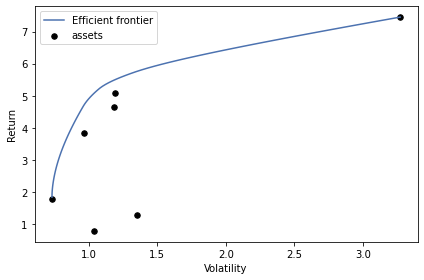

In [12]:
plotting.plot_efficient_frontier(ef, show_asset = True)

In [13]:
ef.tickers

['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT', 'LTCUSDT']

In [14]:
ef.expected_returns

array([1.77618971, 3.84002882, 5.09357123, 1.2971163 , 4.64960646,
       7.44880346, 0.78596867])

In [15]:
np.diag(ef.cov_matrix) ** (1/2)

array([0.73254928, 0.96385631, 1.19315846, 1.35459829, 1.18695077,
       3.27105936, 1.04112652])

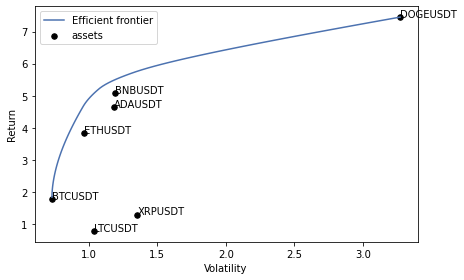

In [16]:
ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets = True)

for i, txt in enumerate(ef.tickers):
    ax.annotate(txt, ((np.diag(ef.cov_matrix)**(1/2))[i], ef.expected_returns[i]))

In [17]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [18]:
weights

OrderedDict([('BTCUSDT', 0.0),
             ('ETHUSDT', 0.2035520839657062),
             ('BNBUSDT', 0.4478531215636344),
             ('XRPUSDT', 0.0),
             ('ADAUSDT', 0.2680018677116404),
             ('DOGEUSDT', 0.0805929267590192),
             ('LTCUSDT', 0.0)])

In [19]:
ef.portfolio_performance(verbose=True)

Expected annual return: 490.9%
Annual volatility: 100.1%
Sharpe Ratio: 4.89


(4.909241732859492, 1.000667851970977, 4.885978622406366)

In [20]:
ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()

In [21]:
weights

OrderedDict([('BTCUSDT', 0.9678076650624258),
             ('ETHUSDT', 0.0),
             ('BNBUSDT', 0.0),
             ('XRPUSDT', 0.0080325632130712),
             ('ADAUSDT', 0.0241597717245032),
             ('DOGEUSDT', 0.0),
             ('LTCUSDT', 0.0)])

In [22]:
ef.portfolio_performance(verbose=True)

Expected annual return: 184.2%
Annual volatility: 73.2%
Sharpe Ratio: 2.49


(1.841762615833598, 0.7320394972093357, 2.488612462549466)